In [7]:
#   imports

from library import xy_from_dict_fn
from initialize import Experiment
from metrics import Bins, EarthMoversDistance, EMDPairwise
from figures import MatrixAnimated, PlotLine


In [2]:
#   global variable declaration

colors = ['sienna', 'tomato', 'orange', 'darkgoldenrod', 'limegreen', 
          'yellowgreen', 'teal', 'deepskyblue', 'royalblue', 'slateblue', 
          'darkviolet', 'orchid', 'hotpink']
experiment_number = 20230404


In [3]:
#   initialize

experiment = Experiment(20230404)
pop_dict_list = [experiment.well_dict[w].gfp_pop_dict 
                 for w in experiment.well_id_list]
well_gfp_emd_dict = {}
for well_id, pop_dict in zip(experiment.well_id_list, pop_dict_list):
    well_gfp_emd_dict[well_id] = EarthMoversDistance(pop_dict, pop_dict_list)
gfp_emd_pairwise = EMDPairwise(experiment.timestep_list, pop_dict_list, 
                               experiment.well_id_list)


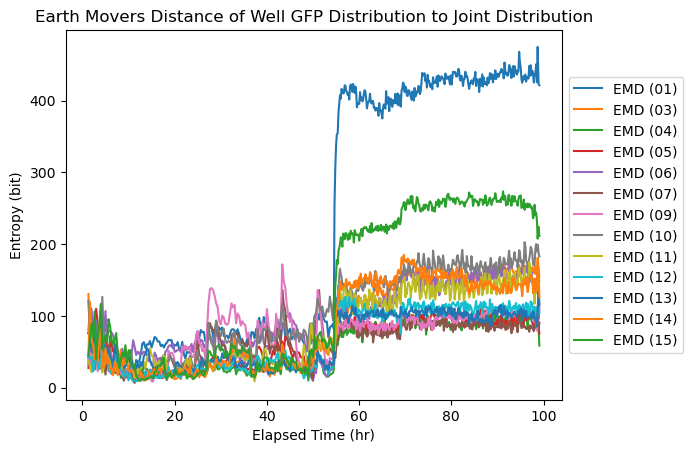

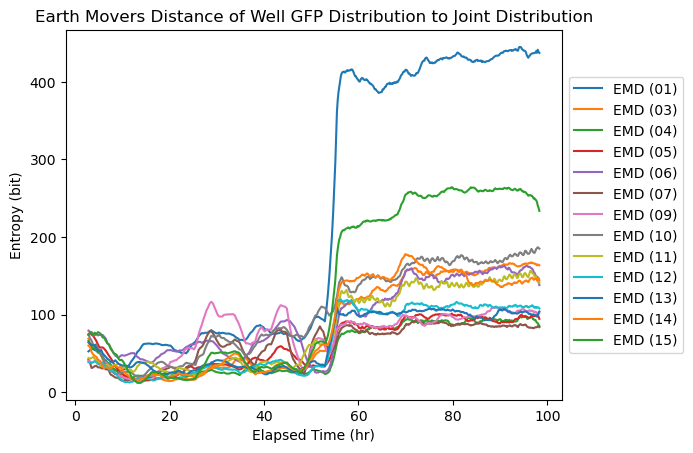

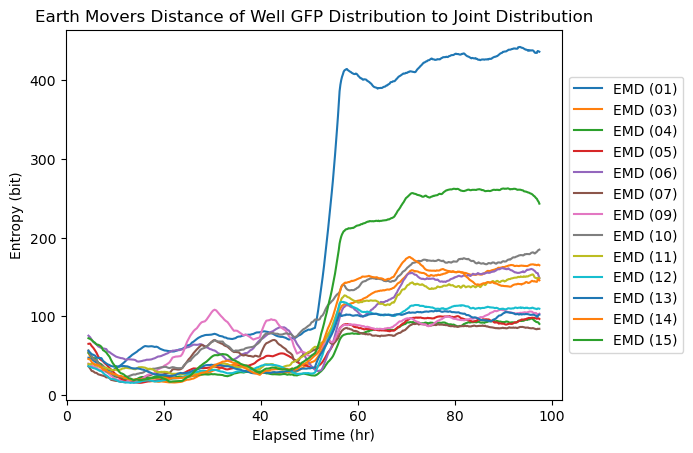

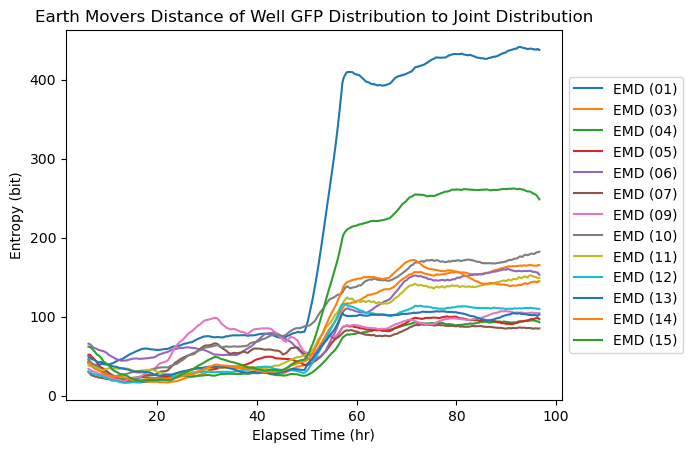

In [4]:
#   plot entropy of each well's gfp distribution as a function of time

x_list = []
y_list = []
for well_id in experiment.well_id_list:
    x, y = xy_from_dict_fn(well_gfp_emd_dict[well_id].emd_dict)
    x = [experiment.elapsed_dict[t] for t in x]
    x_list.append(x)
    y_list.append(y)

for avg in (1, 10, 20, 30):
    plot = PlotLine(x_list, y_list, avg=avg, 
                    label_list=[f'EMD ({w})' 
                                for w in experiment.well_id_list], 
                    color_list=experiment.colors, 
                    title='Earth Movers Distance of Well GFP Distribution to '\
                    'Joint Distribution', 
                    xlabel='Elapsed Time (hr)', ylabel='Entropy (bit)', 
                    save='earth_movers_distance_figures/gfp_all_well_emd_avg_'\
                    f'{avg}.png') 
    plot.show()


In [9]:
#    animate pairwise mutual information of gfp through time

ticklabels = gfp_emd_pairwise.well_id_list
ticks = [i for i in range(len(ticklabels))]
animatrix = MatrixAnimated(gfp_emd_pairwise.emd_matrix_dict, 
                           experiment.elapsed_dict, clim=(0,450), 
                           xticklabels=ticklabels, xticks=ticks, 
                           yticklabels=ticklabels, yticks=ticks, 
                           title='Pairwise Earth Movers Distance by Well',
                           cbar_label = 'Mutual Information (bit)',
                           xlabel='Well Number', ylabel='Well Number', 
                           save=f'earth_movers_distance_figures/'\
                           'gfp_emd_pairwise.mp4')
animatrix.show()
